# Import libraries


In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Read Data 

In [3]:
cc = pd.read_excel("E:/Naive/default of credit card clients.xlsx", sheetname ='Data')

# Checking first and last five rows 

In [4]:
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
cc.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# Shape of the data

In [7]:
cc.shape

(30000, 25)

# Droping the ID variable as it is of no use in our analysis

In [8]:
cc = cc.drop("ID",axis=1)

In [9]:
cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA

# Checking for missing values

In [10]:
pd.isnull(cc).sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [11]:
# Checking data type
print(cc.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object


In [12]:
# factorize columns of a pandas data frame
cc.SEX = cc.SEX.astype("category")
cc.EDUCATION = cc.EDUCATION.astype('category')
cc.MARRIAGE = cc.MARRIAGE.astype('category')
cc.PAY_2 = cc.PAY_2.astype('category')
cc.PAY_3 = cc.PAY_3.astype('category')
cc.PAY_4 = cc.PAY_4.astype('category')
cc.PAY_5 = cc.PAY_5.astype('category')
cc.PAY_6 = cc.PAY_6.astype('category')
cc.DEFAULT = cc.DEFAULT.astype('category')

In [13]:
cc.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0           int64
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object

In [14]:
# Subsetting numeric and categorical variables for better analysis
catvars =['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEFAULT'] 
cols = list(cc.columns.values)
numvars = list()
for elements in cols:
    if elements not in catvars:
        numvars.append(elements)
numvars       

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# Summary Statistics

In [15]:
print (cc.describe())

            LIMIT_BAL           AGE         PAY_0      BILL_AMT1  \
count    30000.000000  30000.000000  30000.000000   30000.000000   
mean    167484.322667     35.485500     -0.016700   51223.330900   
std     129747.661567      9.217904      1.123802   73635.860576   
min      10000.000000     21.000000     -2.000000 -165580.000000   
25%      50000.000000     28.000000     -1.000000    3558.750000   
50%     140000.000000     34.000000      0.000000   22381.500000   
75%     240000.000000     41.000000      0.000000   67091.000000   
max    1000000.000000     79.000000      8.000000  964511.000000   

           BILL_AMT2     BILL_AMT3      BILL_AMT4      BILL_AMT5  \
count   30000.000000  3.000000e+04   30000.000000   30000.000000   
mean    49179.075167  4.701315e+04   43262.948967   40311.400967   
std     71173.768783  6.934939e+04   64332.856134   60797.155770   
min    -69777.000000 -1.572640e+05 -170000.000000  -81334.000000   
25%      2984.750000  2.666250e+03    2326.7500

In [16]:
cc['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

# Scatter plots Limit Balance vs AGE colour by payment default

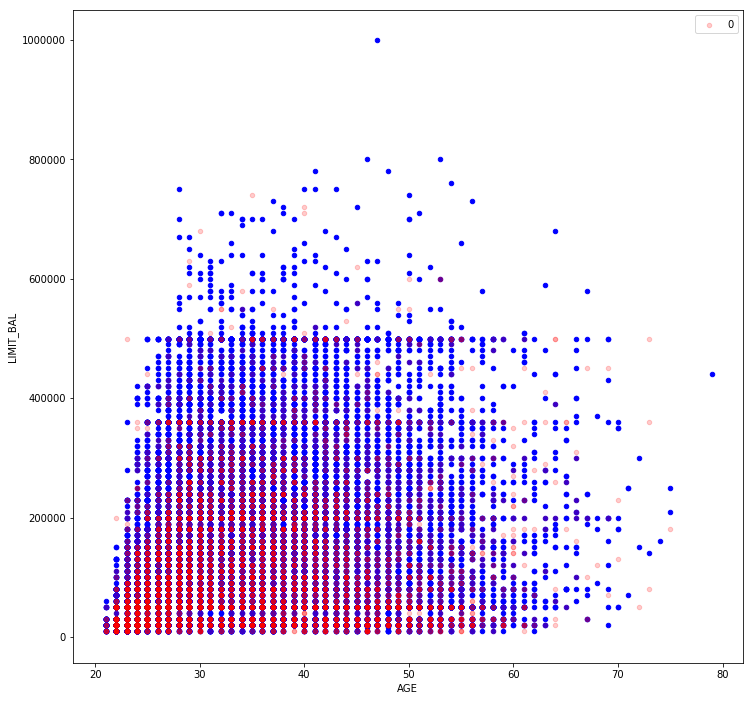

In [19]:
ax = cc[cc['DEFAULT']== 0].plot.scatter(x = 'AGE',
                                        y = 'LIMIT_BAL',
                                        color = 'Blue',
                                        Label = '1')
cc[cc['DEFAULT']==1].plot.scatter(x = 'AGE',
                                y= 'LIMIT_BAL',
                                color ='Red',
                                figsize=(12,12),
                                label='0',ax=ax,alpha=0.2)

# Default by demographics

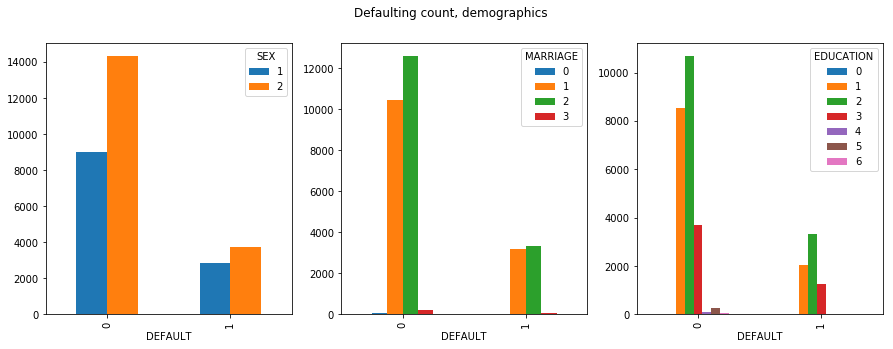

In [215]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
fig.suptitle('Defaulting count, demographics')

d = cc.groupby(['DEFAULT', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = cc.groupby(['DEFAULT', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = cc.groupby(['DEFAULT', 'EDUCATION']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

# Corelation

In [152]:
print(cc.corr())

           LIMIT_BAL       AGE     PAY_0  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
LIMIT_BAL   1.000000  0.144713 -0.271214   0.285430   0.278314   0.283236   
AGE         0.144713  1.000000 -0.039447   0.056239   0.054283   0.053710   
PAY_0      -0.271214 -0.039447  1.000000   0.187068   0.189859   0.179785   
BILL_AMT1   0.285430  0.056239  0.187068   1.000000   0.951484   0.892279   
BILL_AMT2   0.278314  0.054283  0.189859   0.951484   1.000000   0.928326   
BILL_AMT3   0.283236  0.053710  0.179785   0.892279   0.928326   1.000000   
BILL_AMT4   0.293988  0.051353  0.179125   0.860272   0.892482   0.923969   
BILL_AMT5   0.295562  0.049345  0.180635   0.829779   0.859778   0.883910   
BILL_AMT6   0.290389  0.047613  0.176980   0.802650   0.831594   0.853320   
PAY_AMT1    0.195236  0.026147 -0.079269   0.140277   0.280365   0.244335   
PAY_AMT2    0.178408  0.021785 -0.070101   0.099355   0.100851   0.316936   
PAY_AMT3    0.210167  0.029247 -0.070561   0.156887   0.150718   0.130011   

# Scaling the numeric variables

In [153]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cc[numvars] = scale.fit_transform(cc[numvars])

# Train test split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(cc.iloc[:,0:22], cc['DEFAULT'], test_size=0.4, random_state=2)

In [157]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18000, 22), (12000, 22), (18000,), (12000,))

# Model Building

In [189]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [190]:
target_pred = clf.predict(X_test)

# Model Accuracy Calculation

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, target_pred, normalize = True)

0.79691666666666672

# confusion matrix

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,target_pred)

array([[8402,  940],
       [1497, 1161]], dtype=int64)

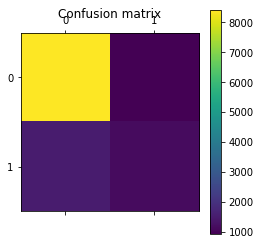

In [193]:
z=confusion_matrix(y_test,target_pred)
plt.matshow(z)
plt.title('Confusion matrix')
plt.colorbar()

# AUC-ROC

ROC AUC: 0.67


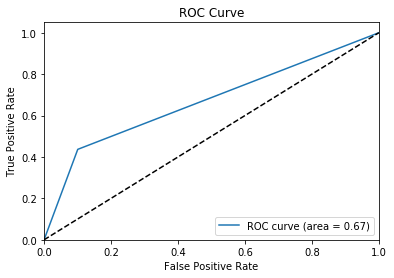

In [180]:
from sklearn.metrics import roc_curve, auc
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, target_pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")